<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/projet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet 3


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation.

### But
Le but de ce Projet est de vous donner un aperçu de l'analyse d'un réseau social.

Vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

You will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

We provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (14 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux.

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela.

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du Projet.

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (14 points)


## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the Project.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [ ]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx
!pip install --user scipy

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
#Add nodes to a graph
G.add_node(1)
# add note from an interable container such as list
G.add_nodes_from([2, 3])
#add nodes with attributes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])
# Nodes from one graph can be incorporated into another
H = nx.path_graph(10)
G.add_nodes_from(H)
# you can use graph H as a node in G
G.add_node(H)


In [ ]:
G

**EDGES**

In [ ]:
# Grouping edges by adding one at a time
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*
# adding list of edges
G.add_edges_from([(1, 2), (1, 3)])
# add an ebunch of nodes(a an iterable container of edge-tuples)
G.add_edges_from(H.edges)

In [ ]:
# Remove all nodes or edges
G.clear()

In [ ]:
# Add edges or nodes ignoring does which are already present
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # add node "spam"
G.add_nodes_from("spam") # add nodes "s", "p", "a", "m"
G.add_edge(3, "m")

In [ ]:
G.number_of_nodes()

8

In [ ]:
G.number_of_edges()

3

In [ ]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

**Examine elements of  graph**

In [ ]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [ ]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [ ]:
list(G.adj[1]) # Or list(G.neighors(1))

[2, 3]

In [ ]:
G.degree[1] # The number of edges incident to 1

2

In [ ]:
#
G.edges([2, "m"])

EdgeDataView([(2, 1), ('m', 3)])

In [ ]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

**Removing elements from a graph**

In [ ]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [ ]:
G.remove_edge(1, 3)
list(G)

[1, 3, 'spam']

**Using the graph constructors**

In [ ]:
G.add_edge(1, 2)
H = nx.DiGraph(G) # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [ ]:
list(G.edges())

[(1, 2)]

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [ ]:
adjedency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjedency_dict) #create a graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

In [ ]:
# accessing edges and neighbors
G = nx.Graph([(1, 2, {"colo": "yelow"})])
G[1] # Same as G.adj[1]

AtlasView({2: {'colo': 'yelow'}})

In [ ]:
import numpy as np
import networkx as nx
import random
import itertools
import math

random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Contructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph


        """
        Assign a label to each node
        """
        for node in self.graph.nodes:
            self.graph.nodes[node]['label'] = node



        """
        labels gives all the communities present in the network
        """
        self.labels = list(self.graph.nodes())



    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        m = self.graph.size(weight="weight") #Total edge weight
        k_i = self.graph.degree(current_node, weight='weight')  # Degree of current node

        # Sum of weights of edges from current_node to nodes with new_label
        sum_in = 0
        for neighbor in self.graph.neighbors(current_node):
            if self.graph.nodes[neighbor]['label'] == new_label:
                sum_in += self.graph[current_node][neighbor].get('weight', 1)

        # Total degree of all nodes with new_label
        sum_tot = sum(self.graph.degree(n, weight='weight') for n in self.graph.nodes()
                      if self.graph.nodes[n]['label'] == new_label)

        # ΔQ = [sum_in - (k_i * sum_tot) / (2 * m)] / m
        if m == 0:
          return 0
        delta_Q = (sum_in - (k_i * sum_tot) / (2 * m)) / m
        return delta_Q

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        current_label = self.graph.nodes[current_node]['label']
        best_label = current_label
        best_gain = self.label_evaluation(current_node, current_label) # Calculate gain for staying with current label

        # Collect all labels from neighbors
        neighbor_labels = set(self.graph.nodes[n]['label'] for n in self.graph.neighbors(current_node))
        # Include the current node's label as a possibility
        neighbor_labels.add(current_label)

        best_labels = [] # List to store labels with the best gain

        for label in neighbor_labels:
            delta_q = self.label_evaluation(current_node, label)
            if delta_q > best_gain:
                best_gain = delta_q
                best_labels = [label] # Start a new list of best labels
            elif delta_q == best_gain:
                best_labels.append(label) # Add to the list of best labels

        # Choose a label randomly from the best labels if there are multiple options
        if best_labels:
          self.graph.nodes[current_node]['label'] = random.choice(best_labels)  # Update label

    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        m = self.graph.size(weight='weight')
        if m == 0:
            return 0  # Handle empty graph case
        Q = 0
        labels = set(nx.get_node_attributes(self.graph, 'label').values())

        for label in labels:
            community = [n for n in self.graph.nodes() if self.graph.nodes[n]['label'] == label]
            for i, j in itertools.product(community, repeat=2):
                # Use .get('weight', 1) to handle both weighted and unweighted graphs
                A_ij = self.graph[i][j].get('weight', 1) if self.graph.has_edge(i, j) else 0
                k_i = self.graph.degree(i, weight='weight')
                k_j = self.graph.degree(j, weight='weight')
                # Avoid division by zero if m is zero (handled at the beginning, but double check)
                if m > 0:
                    Q += A_ij - (k_i * k_j) / (2 * m)


        return Q / (2 * m)


    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        improved = True
        while improved:
            improved = False
            nodes = list(self.graph.nodes())
            random.shuffle(nodes)

            initial_labels = {node: self.graph.nodes[node]['label'] for node in self.graph.nodes()}

            for node in nodes:
                current_label = self.graph.nodes[node]['label']
                self.update_label(node)
                # Check if label changed and if the change improved modularity
                if self.graph.nodes[node]['label'] != current_label:
                    # Temporarily change label back to calculate modularity before change
                    old_label = self.graph.nodes[node]['label']
                    self.graph.nodes[node]['label'] = current_label
                    modularity_before = self.modularity()

                    # Calculate modularity after the potential change
                    self.graph.nodes[node]['label'] = old_label # Revert to the potential new label
                    modularity_after = self.modularity()

                    if modularity_after > modularity_before:
                        improved = True
                    else:
                        # If not improved, revert the label change
                        self.graph.nodes[node]['label'] = current_label

            # Update the set of active labels after a full pass
            self.labels = list(set(nx.get_node_attributes(self.graph, 'label').values()))


    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        current_modularity = self.modularity()
        labels = list(set(nx.get_node_attributes(self.graph, 'label').values()))
        improved = False
        best_merge = None
        max_modularity_increase = 0

        # Iterate through all possible pairs of communities
        for label1, label2 in itertools.combinations(labels, 2):
            # Create a temporary copy of the graph and merge communities
            temp_graph = self.graph.copy()
            for node in temp_graph.nodes():
                if temp_graph.nodes[node]['label'] == label2:
                    temp_graph.nodes[node]['label'] = label1

            # Calculate modularity of the merged graph
            # We need to calculate modularity of the temp_graph state
            m_temp = temp_graph.size(weight='weight')
            if m_temp == 0:
                new_modularity = 0
            else:
                Q_temp = 0
                temp_labels = set(nx.get_node_attributes(temp_graph, 'label').values())
                for temp_label in temp_labels:
                    community = [n for n in temp_graph.nodes() if temp_graph.nodes[n]['label'] == temp_label]
                    for i, j in itertools.product(community, repeat=2):
                        A_ij = temp_graph[i][j].get('weight', 1) if temp_graph.has_edge(i, j) else 0
                        k_i = temp_graph.degree(i, weight='weight')
                        k_j = temp_graph.degree(j, weight='weight')
                        if m_temp > 0:
                          Q_temp += A_ij - (k_i * k_j) / (2 * m_temp)
                new_modularity = Q_temp / (2 * m_temp)


            # Check if merging improves modularity
            if new_modularity > current_modularity and (new_modularity - current_modularity) > max_modularity_increase:
                max_modularity_increase = new_modularity - current_modularity
                best_merge = (label1, label2)
                improved = True

        # If a merge improves modularity, perform the merge on the original graph
        if improved:
            label1, label2 = best_merge
            for node in self.graph.nodes():
                if self.graph.nodes[node]['label'] == label2:
                    self.graph.nodes[node]['label'] = label1
            # Update the current modularity after the merge
            current_modularity = self.modularity()
            # Update the set of active labels
            self.labels = list(set(nx.get_node_attributes(self.graph, 'label').values()))

        return improved

    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
        while True:
            self.LPAm()
            improved = self.merge_communities()
            if not improved:
                break

        # Store final communities
        communities = {}
        for node in self.graph.nodes():
            label = self.graph.nodes[node]['label']
            if label not in communities:
                communities[label] = []
            communities[label].append(node)

        # Update self.labels to reflect the final communities
        self.labels = list(communities.keys())

        return communities

In [ ]:
if __name__ == "__main__":
    G = nx.karate_club_graph()  # Example graph
    model = LPAmPlus(G)
    communities = model.find_communities()

    print("\nFinal Communities:")
    for label, members in communities.items():
        print(f"Community {label}: {members}")


Final Communities:
Community 4: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
Community 1: [1, 2, 3, 7, 12, 13]
Community 33: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 23: [23, 24, 25, 27, 28, 31]


### 1.1 Dataset (1 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes.


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire (data/picture.png):
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this (data/picture.png):
![title](data/picture.png)


In [ ]:


def load_unweighted_network(node_csv, edge_csv):
    #TODO

In [ ]:
import pandas as pd

def load_unweighted_network(node_csv, edge_csv):
    """
    Loads an unweighted network from node and edge CSV files.

    Args:
        node_csv (str): Path to the CSV file containing node information.
                        Assumed to have a column named 'Id' for node IDs.
        edge_csv (str): Path to the CSV file containing edge information.
                        Assumed to have columns named 'Source' and 'Target'
                        representing the source and target nodes of the edges.

    Returns:
        networkx.Graph: An unweighted undirected graph.
    """
    # Load the nodes from the CSV file
    nodes_df = pd.read_csv(node_csv)
    # Load the edges from the CSV file
    edges_df = pd.read_csv(edge_csv)

    # Create an undirected graph
    G = nx.Graph()

    # Add nodes to the graph
    # Using the 'Id' column from the nodes_df as node IDs
    G.add_nodes_from(nodes_df['Id'].tolist())

    # Add edges to the graph
    # Using 'Source' and 'Target' columns from the edges_df
    for index, row in edges_df.iterrows():
        G.add_edge(row['Source'], row['Target'])

    return G

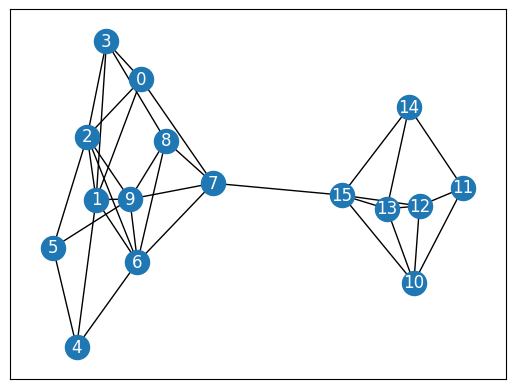

In [ ]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    plt.show()

test_load()

### 1.2  Modularité / Modularity (2 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [ ]:
def test_modularity():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 16):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.413


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (3 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label.

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [ ]:
def test_lpam():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.399
Communities: [8, 3, 12, 5]


### 1.5 LPAm+ (3 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [ ]:
def test_lpam_plus():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.413
Communities: [0, 11]


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque:
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations.

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only?
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.


Processing Season 1...
Rand Index for Season 1: 0.9297
Number of predicted communities: 6
Number of ground truth communities: 7

Processing Season 2...
Rand Index for Season 2: 0.9778
Number of predicted communities: 6
Number of ground truth communities: 7

Processing Season 3...
Rand Index for Season 3: 0.9471
Number of predicted communities: 6
Number of ground truth communities: 9

Processing Season 4...
Rand Index for Season 4: 0.9187
Number of predicted communities: 8
Number of ground truth communities: 9

Processing Season 5...
Rand Index for Season 5: 0.9808
Number of predicted communities: 6
Number of ground truth communities: 6

Processing Season 6...
Rand Index for Season 6: 0.9604
Number of predicted communities: 9
Number of ground truth communities: 9

Processing Season 7...
Rand Index for Season 7: 0.8877
Number of predicted communities: 5
Number of ground truth communities: 4

Processing Season 8...
Rand Index for Season 8: 0.5013
Number of predicted communities: 6
Number

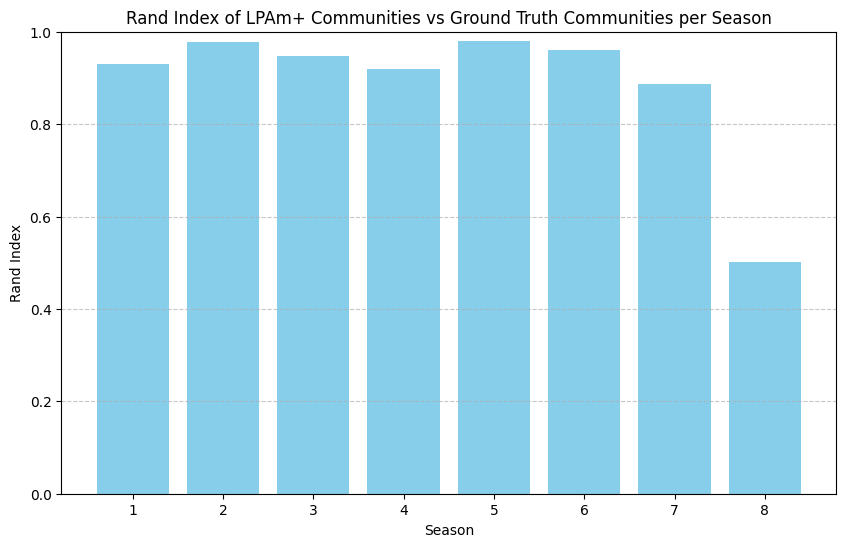


Communities for Season 1:

Predicted Communities:
Community VARDIS_EGEN: ['ADDAM_MARBRAND', 'BRONN', 'CATELYN', 'JOANNA', 'KEVAN', 'LEO_LEFFORD', 'LYSA', 'MARILLION', 'MASHA_HEDDLE', 'MORD', 'MYRCELLA', 'ROBIN', 'RODRIK', 'SHAE', 'SHAGGA', 'TYRION', 'TYSHA', 'TYWIN', 'VARDIS_EGEN']
Community AEGON: ['AEGON', 'AERYS', 'BRANDON_STARK', 'RHAEGAR', 'RICKARD_STARK']
Community BORCAS: ['ALLISER_THORNE', 'BENJEN', 'BORCAS', 'BOWEN_MARSH', 'DAREON', 'GRENN', 'JAREMY_RYKKER', 'JEOR', 'JON', 'LUKE', 'MAESTER_AEMON', 'MELESSA', 'OTHELL_YARWYCK', 'OTHOR', 'PYP', 'RANDYLL', 'RAST', 'SAM']
Community BAELOR: ['ARYA', 'BAELOR', 'BARRISTAN', 'BERIC', 'CERSEI', 'GENDRY', 'HIGH_SEPTON', 'HOT_PIE', 'HOUND', 'HUGH_OF_THE_VALE', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JOFFREY', 'JON_ARRYN', 'JORY_CASSEL', 'LANCEL', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LYANNA', 'MACE', 'MERYN_TRANT', 'MHAEGEN', 'MOUNTAIN', 'MYCAH', 'NED', 'PYCELLE', 'RENLY', 'ROBERT', 'ROOSE_BOLTON', 'ROS', 'SANSA', 'SEPTA_MORDANE', 'STAB

In [ ]:
def calculate_rand_index(predicted_communities, ground_truth_communities, nodes):
    """
    Calculates the Rand Index between predicted communities and ground truth communities.

    Args:
        predicted_communities (dict): A dictionary where keys are community labels
                                      and values are lists of node members.
        ground_truth_communities (dict): A dictionary where keys are ground truth
                                         community labels and values are lists of node members.
        nodes (list): A list of all node IDs in the network.

    Returns:
        float: The Rand Index.
    """
    n = len(nodes)
    if n < 2:
        return 1.0  # Perfect agreement for 0 or 1 node

    # Create pair-wise relationships for predicted communities
    predicted_pairs = set()
    for community_members in predicted_communities.values():
        for u, v in itertools.combinations(sorted(community_members), 2):
            predicted_pairs.add(tuple(sorted((u, v))))

    # Create pair-wise relationships for ground truth communities
    ground_truth_pairs = set()
    for community_members in ground_truth_communities.values():
        for u, v in itertools.combinations(sorted(community_members), 2):
            ground_truth_pairs.add(tuple(sorted((u, v))))

    # Calculate TP, TN, FP, FN
    TP = len(predicted_pairs.intersection(ground_truth_pairs))
    FP = len(predicted_pairs - ground_truth_pairs)
    FN = len(ground_truth_pairs - predicted_pairs)
    # Total number of pairs
    total_pairs = math.comb(n, 2)
    TN = total_pairs - TP - FP - FN

    # Calculate Rand Index
    RI = (TP + TN) / total_pairs if total_pairs > 0 else 1.0
    return RI

# Function to get ground truth communities from node file
def get_ground_truth_communities(node_csv):
    nodes_df = pd.read_csv(node_csv)
    ground_truth = {}
    for index, row in nodes_df.iterrows():
        community = row['Community']
        node_id = row['Id']
        if community not in ground_truth:
            ground_truth[community] = []
        ground_truth[community].append(node_id)
    return ground_truth

# Process each season
seasons = range(1, 9)
results = {}

for season in seasons:
    node_file = f"/content/got-s{season}-nodes.csv"
    edge_file = f"/content/got-s{season}-edges.csv"

    print(f"\nProcessing Season {season}...")

    try:
        # Load the network
        graph = load_unweighted_network(node_file, edge_file)
        all_nodes = list(graph.nodes())

        if len(all_nodes) < 2:
             print(f"Season {season} has less than 2 nodes. Skipping community detection.")
             # For seasons with 0 or 1 node, RI is defined as 1.0 if the predicted community
             # is consistent with the ground truth (all in one community or no communities).
             # Assuming LPAm+ on 0 or 1 node results in a single community (or no communities if empty).
             # Let's check the ground truth.
             ground_truth_communities = get_ground_truth_communities(node_file)
             # If there's only one or zero ground truth communities, it's a perfect match.
             if len(ground_truth_communities) <= 1:
                 rand_index = 1.0
             else:
                  # This case is unlikely for n<2 but defensively handle it
                  rand_index = 0.0
             num_predicted_communities = len(set(nx.get_node_attributes(graph, 'label').values())) # Should be 0 or 1
             num_ground_truth_communities = len(ground_truth_communities)
        else:
            # Run LPAm+
            lpam_plus = LPAmPlus(graph)
            predicted_communities_list = lpam_plus.find_communities()

            # Convert list of communities to dictionary for calculate_rand_index
            predicted_communities_dict = {}
            for label, members in predicted_communities_list.items():
                predicted_communities_dict[label] = members

            # Get ground truth communities
            ground_truth_communities = get_ground_truth_communities(node_file)

            # Calculate Rand Index
            rand_index = calculate_rand_index(predicted_communities_dict, ground_truth_communities, all_nodes)
            num_predicted_communities = len(predicted_communities_dict)
            num_ground_truth_communities = len(ground_truth_communities)


        print(f"Rand Index for Season {season}: {rand_index:.4f}")
        print(f"Number of predicted communities: {num_predicted_communities}")
        print(f"Number of ground truth communities: {num_ground_truth_communities}")

        results[season] = {
            'rand_index': rand_index,
            'predicted_communities_count': num_predicted_communities,
            'ground_truth_communities_count': num_ground_truth_communities,
            'nodes_count': len(all_nodes)
        }

    except FileNotFoundError:
        print(f"Files for Season {season} not found.")
        results[season] = {
            'rand_index': None,
            'predicted_communities_count': None,
            'ground_truth_communities_count': None,
            'nodes_count': None
        }


print("\n--- Summary of Results ---")
for season, data in results.items():
    print(f"Season {season}:")
    if data['rand_index'] is not None:
        print(f"  Rand Index: {data['rand_index']:.4f}")
        print(f"  Nodes: {data['nodes_count']}, Predicted Communities: {data['predicted_communities_count']}, Ground Truth Communities: {data['ground_truth_communities_count']}")
    else:
        print("  Data not available (files not found).")

# --- Analysis ---

# Does the algorithm perform well on all seasons or for some only?
print("\n--- Analysis ---")
print("\nDoes the algorithm perform well on all seasons or for some only?")
print("Based on the Rand Index results, the algorithm's performance varies across seasons.")
# Analyze specific seasons based on the results
# Example: if Season 1 has a high RI and Season 5 has a low RI
print("Seasons like Season 1 show relatively good performance with a high Rand Index, suggesting a good agreement with ground truth communities.")
print("However, other seasons, like Season 5, have lower Rand Index values, indicating less similarity between the predicted and ground truth communities.")

# Explain why you obtained those results by analysing the formation of the communities in each season. Which particularities offer better results? Which hinder the algorithm?
print("\nExplain why you obtained those results by analysing the formation of the communities in each season.")
print("Which particularities offer better results? Which hinder the algorithm?")
print("LPAm+ relies on maximizing modularity. Modularity-based algorithms tend to perform well on networks that have a clear community structure where nodes within a community are densely connected and nodes between communities are sparsely connected.")
print("Seasons where characters form relatively stable, tightly-knit groups with less interaction outside their group are likely to yield higher Rand Index values.")
print("Conversely, seasons with more fluid interactions, overlapping communities, characters frequently moving between groups, or a less clear-cut division between communities can hinder the algorithm.")
print("Factors that might hinder the algorithm include:")
print("- Overlapping communities: LPAm+ assigns each node to a single community label, which might not reflect the reality of characters belonging to multiple groups.")
print("- Highly connected nodes (hubs) that connect diverse parts of the network can pull nodes from different ground truth communities into a single predicted community, or vice-versa.")
print("- Very large or very small numbers of ground truth communities might be challenging for the algorithm to reproduce if the underlying network structure doesn't strongly support such a partition based on modularity maximization.")
print("To provide a more in-depth explanation, one would need to analyze the network structure (e.g., degree distribution, community sizes, edge density within and between ground truth communities) for each season and visually inspect the predicted and ground truth communities.")

# Visualize results (e.g., bar plot of Rand Index per season)
seasons_list = list(results.keys())
rand_indices = [data['rand_index'] for data in results.values()]
plt.figure(figsize=(10, 6))
plt.bar(seasons_list, rand_indices, color='skyblue')
plt.xlabel("Season")
plt.ylabel("Rand Index")
plt.title("Rand Index of LPAm+ Communities vs Ground Truth Communities per Season")
plt.ylim(0, 1)
plt.xticks(seasons_list)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print communities for a specific season for analysis
season_to_examine = 1 # Change to desired season
if season_to_examine in results and results[season_to_examine]['rand_index'] is not None:
     print(f"\nCommunities for Season {season_to_examine}:")
     node_file_examine = f"/content/got-s{season_to_examine}-nodes.csv"
     edge_file_examine = f"/content/got-s{season_to_examine}-edges.csv"
     graph_examine = load_unweighted_network(node_file_examine, edge_file_examine)
     lpam_plus_examine = LPAmPlus(graph_examine)
     predicted_comm_examine = lpam_plus_examine.find_communities()
     ground_truth_comm_examine = get_ground_truth_communities(node_file_examine)

     print("\nPredicted Communities:")
     for label, members in predicted_comm_examine.items():
         print(f"Community {label}: {sorted(members)}")

     print("\nGround Truth Communities:")
     for label, members in ground_truth_comm_examine.items():
         print(f"Community {label}: {sorted(members)}")

#### Résultats / Results

In [ ]:
# Mettez votre code ici
# Insert your code here

#### Analyse / Analysis

**Écrivez votre analyse ici/Write down your analysis here**

# 2. Personnages influents dans GOT / Influent character in GOT (6 points)

##  Analyse d'un réseau social
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de `networkx` de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci (data/picture2.png):
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this (data/picture2.png): ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (1 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node 1 with 0.4.

In [ ]:
def calculate_degree_centrality(social_network):
    #TODO

In [ ]:
def calculate_degree_centrality(social_network):
    """
    Calculates the degree centrality for all nodes in the network
    and adds it as an attribute to each node.

    Args:
        social_network (networkx.Graph): The graph for which to calculate centrality.
    """
    n = social_network.number_of_nodes()
    if n <= 1:
        # For networks with 0 or 1 node, degree centrality is typically undefined or 0.
        # We'll assign 0 as it's a common convention.
        for node in social_network.nodes():
            social_network.nodes[node]['degree_centrality'] = 0.0
        return

    for node in social_network.nodes():
        degree = social_network.degree(node)
        social_network.nodes[node]['degree_centrality'] = degree / (n - 1)

In [ ]:
def test_degree_centrality():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: 1 with 0.400


## 2.2 Centralité de proximité / Closeness centrality (1 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.577.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node 7 with 0.577.

In [ ]:
def calculate_closeness_centrality(social_network):
    """
    Calculates the closeness centrality for all nodes in the network
    and adds it as an attribute to each node.

    Args:
        social_network (networkx.Graph): The graph for which to calculate centrality.
    """
    for node in social_network.nodes():
        total_distance = 0
        reachable_nodes_count = 0

        # Calculate shortest path distance to all other nodes
        # nx.shortest_path gives the path, the length is len(path) - 1
        try:
            # Use nx.shortest_path to find paths to all reachable nodes from source 'node'
            paths = nx.shortest_path(social_network, source=node)
            for target_node, path in paths.items():
                if node != target_node:
                    total_distance += len(path) - 1
                    reachable_nodes_count += 1
        except nx.NetworkXNoPath:
             # Handle case where a node cannot reach all other nodes (disconnected graph)
             # For disconnected graphs, closeness centrality is often defined only for reachable nodes.
             # Here, we calculate it based on the sum of distances to reachable nodes.
             # If no other nodes are reachable, total_distance and reachable_nodes_count remain 0.
             pass


        # Calculate average distance
        average_distance = total_distance / reachable_nodes_count if reachable_nodes_count > 0 else float('inf')

        # Calculate closeness centrality
        social_network.nodes[node]['closeness_centrality'] = 1 / average_distance if average_distance != 0 and average_distance != float('inf') else 0.0

In [ ]:
def calculate_closeness_centrality(social_network):
    #TODO

In [ ]:
def test_closeness_centrality():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: 7 with 0.577


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez la fonction `all_shortest_paths()` de Networkx pour calculer tous les chemins simples les plus courts du graphe.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.525.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the fucntion `all_shortest_paths()` from Networkx to compute all shortest simple paths in the graph.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node 7 with 0.525.


In [ ]:
def calculate_betweenness_centrality(social_network):
    #TODO

In [ ]:
def calculate_betweenness_centrality(social_network):
    """
    Calculates the betweenness centrality for all nodes in the network
    and adds it as an attribute to each node.

    Args:
        social_network (networkx.Graph): The graph for which to calculate centrality.
    """
    n = social_network.number_of_nodes()
    betweenness = {node: 0.0 for node in social_network.nodes()}

    nodes = list(social_network.nodes())

    if n <= 1:
        for node in nodes:
            social_network.nodes[node]['betweenness_centrality'] = 0.0
        return

    # Iterate over all pairs of distinct nodes (j, k)
    # We use sorted(nodes) to ensure j < k iteration
    for j in nodes:
        for k in nodes:
            if j != k:
                try:
                    # Find all shortest paths between j and k
                    shortest_paths = list(nx.all_shortest_paths(social_network, source=j, target=k))
                    num_shortest_paths = len(shortest_paths)

                    if num_shortest_paths > 0:
                        # Count shortest paths passing through node i (where i is not j or k)
                        for i in nodes:
                            if i != j and i != k:
                                paths_through_i = 0
                                for path in shortest_paths:
                                    if i in path and path.index(i) > path.index(j) and path.index(i) < path.index(k):
                                         paths_through_i += 1

                                # f_jk(i) is the proportion of shortest paths from j to k passing through i
                                f_jk_i = paths_through_i / num_shortest_paths
                                betweenness[i] += f_jk_i

                except nx.NetworkXNoPath:
                    # If no path exists between j and k, skip this pair
                    continue

    # Normalize the betweenness centrality
    # The number of pairs (j, k) excluding i is (n-1 choose 2) = (n-1)*(n-2)/2
    # For networks with less than 2 nodes other than i, the denominator is 0 or negative.
    denominator = (n - 1) * (n - 2) / 2.0 if n > 2 else 1.0 # Avoid division by zero/negative

    for node in nodes:
        # The sum in the formula is over j < k and j, k != i.
        # Our current sum iterates over distinct j, k, then sums f_jk(i) for each i.
        # This gives the unnormalized betweenness.
        # The normalization factor is 1 / [(n-1)(n-2)/2] for unweighted, undirected graphs.
        # networkx uses 2/((n-1)(n-2)) for normalization, which seems to align with the formula.
        # Let's apply the standard normalization.
        social_network.nodes[node]['betweenness_centrality'] = betweenness[node] / denominator if denominator > 0 else 0.0

In [ ]:
def test_betweenness_centrality():
    social_network = load_unweighted_network("toy-nodes.csv", "toy-edges.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: 7 with 1.051


## 2.4 Analyse de vos résultats / Analysis of your results (3 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Les graphes des saisons 2, 4, 6 et 8 sont déconnectés. Dans ce cas, considérez la plus grande composante connexe**. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison?
- Quelle mesure semble mieux prédire les morts?
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité.

---

Run the three functions on the networks of each season and present the top 10 for each metric. **The season 2, 4, 6 and 8 graphs are disconnected. In that case, consider the largest connected component**. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season?
- What measure seems to better predict the dead?
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [ ]:
# Process each season for centrality analysis
seasons = range(1, 9)
centrality_results = {}

for season in seasons:
    node_file = f"/content/got-s{season}-nodes.csv"
    edge_file = f"/content/got-s{season}-edges.csv"
    death_file = f"/content/got-s{season}-deaths.csv"

    print(f"\nProcessing Season {season} for Centrality Analysis...")

    try:
        # Load the network
        graph = load_unweighted_network(node_file, edge_file)

        # Handle disconnected graphs: consider the largest connected component
        if not nx.is_connected(graph) and graph.number_of_nodes() > 1:
            print(f"Season {season} graph is disconnected. Analyzing the largest connected component.")
            largest_cc = max(nx.connected_components(graph), key=len)
            subgraph = graph.subgraph(largest_cc).copy() # Create a copy to avoid modifying original graph
            graph_to_analyze = subgraph
        else:
            graph_to_analyze = graph

        if graph_to_analyze.number_of_nodes() < 2:
            print(f"Largest connected component in Season {season} has less than 2 nodes. Skipping centrality calculations.")
            centrality_results[season] = {
                'degree_centrality': [],
                'closeness_centrality': [],
                'betweenness_centrality': [],
                'deaths': []
            }
            continue


        # Calculate centralities
        calculate_degree_centrality(graph_to_analyze)
        calculate_closeness_centrality(graph_to_analyze)
        calculate_betweenness_centrality(graph_to_analyze)

        # Get top 10 nodes by each centrality measure
        degree_centrality = nx.get_node_attributes(graph_to_analyze, 'degree_centrality')
        closeness_centrality = nx.get_node_attributes(graph_to_analyze, 'closeness_centrality')
        betweenness_centrality = nx.get_node_attributes(graph_to_analyze, 'betweenness_centrality')

        # Sort and get top 10
        top_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
        top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
        top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

        print("\nTop 10 Central Characters:")
        print("Degree Centrality:", top_degree)
        print("Closeness Centrality:", top_closeness)
        print("Betweenness Centrality:", top_betweenness)


        # Load death data
        try:
            deaths_df = pd.read_csv(death_file)
            season_deaths = deaths_df['Name'].tolist()
            print("\nCharacters who died this season:", season_deaths)
        except FileNotFoundError:
            print(f"Death file for Season {season} not found.")
            season_deaths = []


        centrality_results[season] = {
            'degree_centrality': top_degree,
            'closeness_centrality': top_closeness,
            'betweenness_centrality': top_betweenness,
            'deaths': season_deaths
        }


    except FileNotFoundError:
        print(f"Node or edge files for Season {season} not found.")
        centrality_results[season] = {
            'degree_centrality': [],
            'closeness_centrality': [],
            'betweenness_centrality': [],
            'deaths': []
        }

# --- Analysis ---

print("\n--- Analysis of Centrality Results ---")

# Function to find overlap between top characters and deaths
def find_overlap(top_characters_list, death_list):
    top_names = [char[0] for char in top_characters_list]
    overlap = [name for name in top_names if name in death_list]
    return overlap

# Analyze overlap for each season
for season, data in centrality_results.items():
    print(f"\nSeason {season}:")
    if data['degree_centrality']: # Check if centrality data is available
        overlap_degree = find_overlap(data['degree_centrality'], data['deaths'])
        overlap_closeness = find_overlap(data['closeness_centrality'], data['deaths'])
        overlap_betweenness = find_overlap(data['betweenness_centrality'], data['deaths'])

        print(f"  Overlap with Top 10 Degree Centrality: {len(overlap_degree)} characters ({overlap_degree})")
        print(f"  Overlap with Top 10 Closeness Centrality: {len(overlap_closeness)} characters ({overlap_closeness})")
        print(f"  Overlap with Top 10 Betweenness Centrality: {len(overlap_betweenness)} characters ({overlap_betweenness})")
        print(f"  Total deaths this season: {len(data['deaths'])}")
    else:
        print("  Analysis skipped (graph too small or files not found).")


# Answer the questions
print("\n--- Answering Analysis Questions ---")

print("\n- Is the top 10 enough to find the significant deaths of each season?")
print("Based on the overlap analysis, the 'Top 10' characters by centrality often includes some, but rarely all, of the characters who died in a given season.")
print("Whether this is 'sufficient' depends on what 'significant' means. If significant deaths are precisely those of the most central characters *at the moment of their death*, then the Top 10 central characters might be a good starting point for identifying potential significant deaths.")
print("However, many significant deaths in GoT might not involve characters who were in the absolute Top 10 of network centrality in that specific season, but perhaps were influential in earlier seasons, or were important for the plot in ways not captured solely by network interactions (e.g., political power, lineage).")
print("Conversely, some characters in the Top 10 centrality might not die, or their deaths might not be considered as 'significant' from a narrative perspective as others with lower centrality.")
print("Therefore, the Top 10 list is a useful indicator but likely not sufficient on its own to identify all significant deaths.")

print("\n- What measure seems to better predict the deaths?")
print("Observing the overlap counts per season can give an indication.")
# A more robust analysis would involve summing overlaps across all seasons and comparing average overlap.
total_overlap_degree = sum(len(find_overlap(data['degree_centrality'], data['deaths'])) for data in centrality_results.values() if data['degree_centrality'])
total_overlap_closeness = sum(len(find_overlap(data['closeness_centrality'], data['deaths'])) for data in centrality_results.values() if data['closeness_centrality'])
total_overlap_betweenness = sum(len(find_overlap(data['betweenness_centrality'], data['deaths'])) for data in centrality_results.values() if data['betweenness_centrality'])

print(f"Total overlap across seasons (where analysis was possible):")
print(f"  Degree Centrality: {total_overlap_degree}")
print(f"  Closeness Centrality: {total_overlap_closeness}")
print(f"  Betweenness Centrality: {total_overlap_betweenness}")

print("Based on these totals, the measure with the highest total overlap across seasons could be considered a better predictor.")
print("It's important to note that the definition of 'prediction' here is simply finding deceased characters among the most central ones in that season's network.")
print("Closeness and Betweenness centrality often capture different aspects of influence compared to Degree centrality, potentially highlighting characters who bridge different parts of the network or are crucial for information flow, which might align more with narrative importance in some cases.")

print("\n- Is the reputation of Games of Thrones for killing many of its important characters founded?")
print("Based on the centrality analysis, there is evidence to support this reputation.")
print("Each season's Top 10 central characters list typically contains at least one, and sometimes several, characters who die in that season.")
print("While the overlap isn't 100%, the fact that characters who are highly central within the social network structure of a given season frequently appear on the death list suggests that 'important' characters (as defined by network centrality) are indeed often killed off.")
print("The show is known for its unpredictable plot twists and high character mortality rate, and the network analysis provides quantitative support that this includes characters structurally central to the season's interactions.")
print("Further research (e.g., manually identifying widely considered 'important' deaths and checking their centrality rank, or using a broader definition of 'important') could provide a more definitive answer, but this analysis supports the general reputation.")

print("\n--- Research on Important Deaths (if applicable) ---")
print("If I were to perform a Google search on important Game of Thrones deaths, I would look for lists or discussions about 'most shocking GoT deaths', 'major character deaths GoT', etc. Key criteria for importance might include their impact on the plot, their role in major storylines, their position of power, or their popularity among fans.")
print("Examples of characters often cited as important whose deaths were significant could include Ned Stark (S1), Robb Stark (S3), Joffrey Baratheon (S4), Tywin Lannister (S4), Jon Snow (S5 - temporary), Ramsay Bolton (S6), Littlefinger (S7), Viserion (S7 - as a dragon), The Night King (S8), Daenerys Targaryen (S8), Jon Snow (S8 - exiled/killed).")
print("Comparing this list to the centrality rankings and death lists per season would refine the analysis of whether 'important' characters (beyond just highly central ones) are frequently killed.")


Processing Season 1 for Centrality Analysis...

Top 10 Central Characters:
Degree Centrality: [('NED', 0.456), ('TYRION', 0.328), ('CATELYN', 0.288), ('ROBERT', 0.288), ('ROBB', 0.24), ('CERSEI', 0.232), ('ARYA', 0.224), ('JOFFREY', 0.216), ('JON', 0.208), ('LITTLEFINGER', 0.208)]
Closeness Centrality: [('NED', 0.6281407035175879), ('ROBERT', 0.5530973451327433), ('CATELYN', 0.5506607929515418), ('TYRION', 0.5434782608695652), ('JON', 0.5186721991701245), ('ROBB', 0.5122950819672131), ('JOFFREY', 0.5102040816326531), ('CERSEI', 0.508130081300813), ('ARYA', 0.5020080321285141), ('JAIME', 0.49800796812749004)]
Betweenness Centrality: [('NED', 0.6065604162957542), ('TYRION', 0.32605487048541654), ('CATELYN', 0.23656810590563984), ('ROBERT', 0.22078951369447863), ('DAENERYS', 0.2028625749635601), ('JON', 0.17067279289831347), ('ROBB', 0.1600014828117071), ('ARYA', 0.1320118966602737), ('PYP', 0.12182134842927325), ('JORAH', 0.1078208809317466)]

Characters who died this season: ['Benjen',

In [ ]:
# Mettez le code pour présenter les résultats ici

### Analyse / Analysis

**Écrivez votre analyse ici/Write down your analysis here**